Stanford Deep Learning Course
Exercise 1 Warm up

In [1]:
#Return identity matrix for integer n
def eye(n):
    r = [[0 if x is not y else 1 for y in xrange(n)] for x in xrange(n)]# if x is not y]
    return r

In [2]:
eye(5)

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

Section 2: Linear Regression

In [3]:
%matplotlib inline
import numpy as np
import pylab as pyplt
import matplotlib.pyplot as plt

import pandas as pd

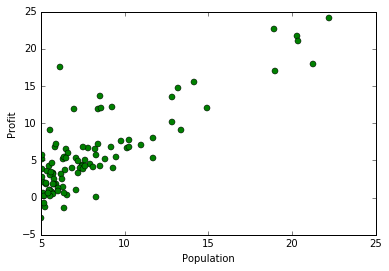

In [4]:
f = pd.read_csv('ex1data1.txt')
df = pd.DataFrame(f,columns=['population','profit'])#, usecols=range(f))

fig = plt.subplots()
plt.plot(df['population'],df['profit'],'go')
plt.xlabel('Population')
plt.ylabel('Profit')

In [5]:
x = np.array(df.population.values,dtype='float')
y = np.array(df.profit.values,dtype='float')

y = [ [i] for i in y]
x = [ [i] for i in x]
x = np.hstack((np.ones([len(x),1]),x))


theta = np.zeros([2,1])
iterations = 1500
alpha = 0.01

Gradient Descent. Down down down we go

In [6]:
def computeCost(x,y,theta):
    return float(1./(2*len(y)) * np.dot(( np.dot(x,theta) - y ).T, (np.dot(x,theta)-y)))

In [7]:
computeCost(x,y,theta=np.zeros([2,1]))

32.072733877455676

In [8]:
def gradientDescent(x,y,theta,alpha,iterations):
    cost = []
    for i in xrange(iterations):
        cost.append(computeCost(x,y,theta))
        theta -= alpha/len(y) * np.dot((np.dot(x,theta) - y).T,x ).reshape(len(theta),1)
    return theta, cost

In [9]:
theta = np.zeros([2,1])
theta_new, cost = gradientDescent(x,y,theta,alpha,iterations)
#print "length: ", len(theta)

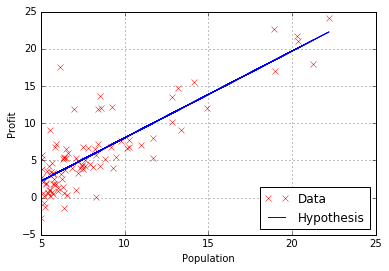

In [10]:
from collections import OrderedDict 
#slope, intercept = np.polyfit(X, Y, 1)
fig = plt.subplots()
plt.xlim(5,25)
plt.plot(df['population'],df['profit'],'rx',label='Data')
plt.plot(x, x*theta_new[1] + theta_new[0], 'b-',label='Hypothesis')#= %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.xlabel('Population')
plt.ylabel('Profit')
plt.grid(True)

#These 3 lines prevent legend from printing duplicates
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),loc=4)
plt.show()

In [11]:
def plotConv(cost_,ymin,ymax):
    fig1 = plt.subplots()
    plt.plot(cost_)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.ylim(ymin,ymax)
    plt.grid(True)
    plt.show()

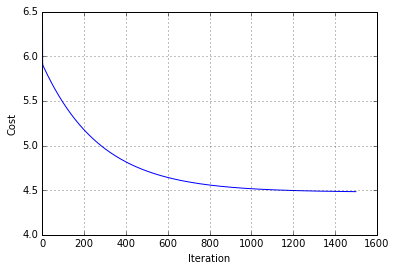

In [12]:
plotConv(cost,4,6.5)
#plt.ylim(4,8)

Compute Cost as function of theta0 and theta1

2000 2000
4.47845322086 688.341012042 2000


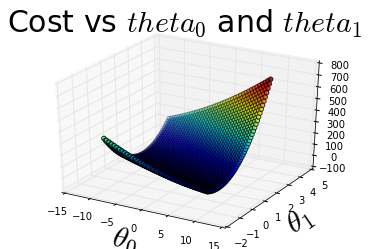

In [13]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
from matplotlib import cm
import itertools

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta0 = np.arange(-10,10,.5)
theta1 = np.arange(-1,4,.1)

xx = [ i for i in theta0 for j in theta1 ]
yy = [ j for j in theta0 for j in theta1 ]

print len(xx), len(yy)

#xx, yy = np.meshgrid(xx, yy)
zz = []

for i in theta0:
    for j in theta1:
        theta_temp = np.array([[i],[j]])
        zz.append(computeCost(x,y,theta_temp))
        
print min(zz), max(zz), len(zz)

ax.scatter(xx,yy,zz,c=np.abs(zz))
plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost vs $theta_0$ and $theta_1$',fontsize=30)

#cset = ax.contourf(xx, yy, zz, zdir='z')#,          # direction to project the contour
                   #offset=-10)#,        # how "far" render the contour map

Now do linear regression for multiple variables

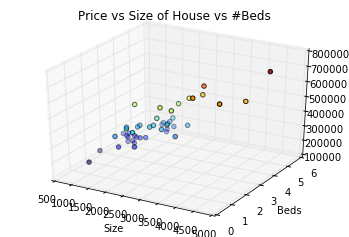

In [14]:
f2 = pd.read_csv('ex1data2.txt')
df2 = pd.DataFrame(f2,columns=['size','beds','price'])#, usecols=range(f))

fig = plt.figure()#subplots()
ax3d = fig.add_subplot(111,projection='3d')
ax3d.scatter(df2['size'],df2['beds'],df2['price'],c=np.abs(df2['price']))
plt.xlabel('Size')
plt.ylabel('Beds')
plt.title('Price vs Size of House vs #Beds')

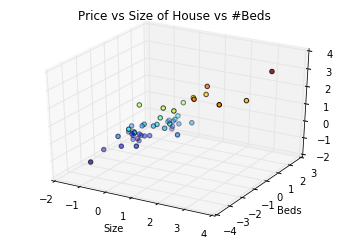

In [15]:
size_1 = ( df2['size'] - df2['size'].mean() ) /  df2['size'].std()
beds_1 = ( df2['beds'] - df2['beds'].mean() ) /  df2['beds'].std()
price_1 = ( df2['price'] - df2['price'].mean() ) /  df2['price'].std()

means = np.array([ df2['size'].mean(), df2['beds'].mean(), df2['price'].mean()])
stds =  np.array([ df2['size'].std(), df2['beds'].std(), df2['price'].std()])

fig = plt.figure()
ax3d = fig.add_subplot(111,projection='3d')
ax3d.scatter(size_1,beds_1,price_1,c=np.abs(df2['price']))
plt.xlabel('Size')
plt.ylabel('Beds')
plt.title('Price vs Size of House vs #Beds')

In [16]:
x1 = np.array(size_1,dtype='float') #df2.size.values,dtype='float')
x2 = np.array(beds_1,dtype='float')
y = np.array(price_1,dtype='float')

y_new = [ [i] for i in y]
x_new = [ [x1[i],x2[i]] for i in xrange(len(x1))]
x_new = np.hstack((np.ones([len(x_new),1]),x_new))

theta = np.zeros([3,1])
iterations = 1500
alpha = 0.01

theta_new, cost2 = gradientDescent(x_new,y_new,theta,alpha,iterations)
#print cost2

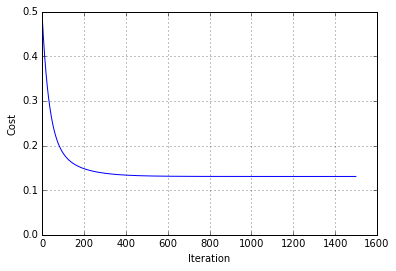

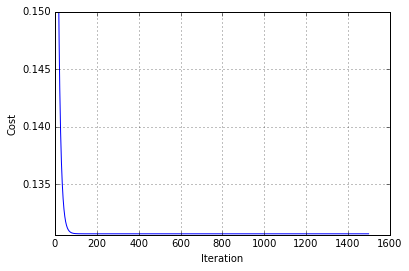

In [17]:
plotConv(cost2,0,0.5)

theta = np.zeros([3,1])
iterations = 1500
alpha = 0.1
theta_new, cost3 = gradientDescent(x_new,y_new,theta,alpha,iterations)
plotConv(cost3,.1306,.15)

In [18]:
temp = np.array([1650.,3.])

scaled = [(temp[i] - means[i])/ stds[i] for i in xrange(len(temp))]
scaled.insert(0,1)

print "Predicted price of a house with 1650 square feet and 3 bedrooms: "
print "%0.2f" % (float(np.dot(scaled,theta)) * stds[-1] + means[-1]) , "bucks"

Predicted price of a house with 1650 square feet and 3 bedrooms: 
293081.46 bucks


In [20]:
from numpy.linalg import inv

# These next bunch of lines are because I grabbed the data in a dumb way originally
# Need to grab again
size_f =  df2['size'] 
beds_f =  df2['beds'] 
price_f =  df2['price']

x1_f = np.array(size_f,dtype='float')
x2_f = np.array(beds_f,dtype='float')
y_f = np.array(price_f,dtype='float')

y_fin = [ [i] for i in y_f]
x_fin = [ [x1_f[i],x2_f[i]] for i in xrange(len(x1_f))]
x_fin = np.hstack((np.ones([len(x_fin),1]),x_fin))

print x_fin.shape

final_theta = np.dot(np.dot(inv(np.dot(x_fin.T,x_fin)),x_fin.T),y_fin)

print "Housing price via non-scaling method: ", float(np.dot(final_theta.T,[1,1650.,3.]))

(47, 3)
Housing price via non-scaling method:  293081.464335
